Corona simulator
===============

*Very simple* model for the spread of an epidemic. Inspired by the neat models presented in [this Washington Post article](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/) and the COVID-19 epidemic. 

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


todo: 

- [x] randomize velocity directions
- [x] step position based on velocity
- [x] check collision
- [x] time series of infections
- [x] on/off sickness
- [ ] deaths
- [ ] recoveries
- [ ] impact of quarantine / social distancing
- [ ] random walks 
- [x] elastic collisions (but probably buggy)

In [7]:
import numpy as np
import celluloid
from IPython.display import HTML
import random
import tqdm

In [1]:
cd ~/Dropbox/codes/python/epidemic-simulation/

/Users/nemmen/Dropbox/codes/python/epidemic-simulation


# initialization

## Initial parameters for simulation

box size in "meters" 

In [59]:
xbox0,xbox1=0,200
ybox0,ybox1=0,100

how many agents?

In [60]:
nagents=40

duration of simulation

In [71]:
tf=400
nsteps=200

distance for an agent to get infected

In [72]:
dinfect=5

what fraction of agents are initially infected?

In [73]:
sick=0.03

time to recover **(TBD)**

In [74]:
trec=7

- fraction of people that will die
- time to die **(TBD)**

In [75]:
deaths=0.01
tdie=trec

## package parameters in a nice dictionary

In [76]:
pars={"xbox0":xbox0,
   "xbox1":xbox1,
   "ybox0":ybox0,
   "ybox1":ybox1,
   "nagents":nagents,
   "sick":sick,
   "dinfect":dinfect,
   "trec":trec
  }

initialize a population of healthy and sick agents

In [77]:
import corona
p=corona.Agents(pars)

# simulation

In [78]:
# time array
tarr=linspace(0,tf,nsteps)

# dt array
dtarr=[t - s for s, t in zip(tarr, tarr[1:])]

# time series of sick agents (overwrites previously defined sick variable)
sick=zeros_like(tarr)

time stepping

100%|██████████| 199/199 [00:00<00:00, 280.73it/s]
/Users/nemmen/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)
/Users/nemmen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


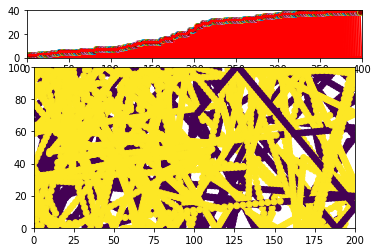

In [79]:
fig = figure(constrained_layout=True)
camera = celluloid.Camera(fig)

# setup subpanels
gs = fig.add_gridspec(4, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1:, 0])

k=0

for dt in tqdm.tqdm(dtarr):
    # update state variables
    p.update(dt)
    
    # stats
    sick[k]=size(where(p.health==1))
            
    # plotting
    # ==========
    #subplot(2,1,1)
    ax1.plot(tarr,sick,'red')
    ax1.fill_between(tarr, zeros_like(sick), sick, alpha=0.3, facecolor='red')
    ax1.plot(tarr[k],sick[k],'o', markerfacecolor='DarkRed')  
    ax1.set_xlim(0,tarr[-1])
    ax1.set_ylim(0,nagents)
    ax1.set_xlabel('Time')

    #subplot(2,1,2)    
    ax2.scatter(p.x,p.y,c=p.health)
    ax2.set_xlim(xbox0,xbox1)
    ax2.set_ylim(ybox0,ybox1)
    #ax2.axes().set_aspect('equal')
    ax2.set_aspect('equal')
    
    camera.snap()
    k=k+1

plays simulation in your browser

In [80]:
%%time
animation = camera.animate()
HTML(animation.to_html5_video())

/Users/nemmen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  


CPU times: user 29.4 s, sys: 316 ms, total: 29.7 s
Wall time: 29.9 s


export movie

In [18]:
animation.save('animation.mp4')

/Users/nemmen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  """Entry point for launching an IPython kernel.


# sandbox

In [22]:
import importlib

In [54]:
importlib.reload(corona)

<module 'corona' from '/Users/nemmen/Dropbox/codes/python/epidemic-simulation/corona.py'>

In [20]:
linspace(0,20,nagents)

array([ 0.        ,  0.51282051,  1.02564103,  1.53846154,  2.05128205,
        2.56410256,  3.07692308,  3.58974359,  4.1025641 ,  4.61538462,
        5.12820513,  5.64102564,  6.15384615,  6.66666667,  7.17948718,
        7.69230769,  8.20512821,  8.71794872,  9.23076923,  9.74358974,
       10.25641026, 10.76923077, 11.28205128, 11.79487179, 12.30769231,
       12.82051282, 13.33333333, 13.84615385, 14.35897436, 14.87179487,
       15.38461538, 15.8974359 , 16.41025641, 16.92307692, 17.43589744,
       17.94871795, 18.46153846, 18.97435897, 19.48717949, 20.        ])

In [21]:
health

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

100%|██████████| 99/99 [00:00<00:00, 355.19it/s]
/Users/nemmen/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)
/Users/nemmen/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


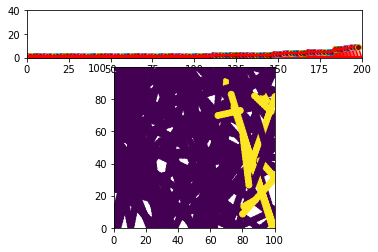

In [16]:
fig = figure(constrained_layout=True)
camera = celluloid.Camera(fig)

# setup subpanels
gs = fig.add_gridspec(4, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1:, 0])

k=0

for dt in tqdm.tqdm(dtarr):
    # update state variables
    # =======================
    
    # reflections
    ## on x
    i=where((x<xbox0) | (x>xbox1))
    if size(i)>0: vx[i]=-vx[i]
    ## on y
    j=where((y<ybox0) | (y>ybox1))
    if size(j)>0: vy[j]=-vy[j]
        
    # steps position
    x=x+vx*dt
    y=y+vy*dt
    
    # health
    ## goes through each particle
    for p in range(nagents):
        # position of current particle
        xp,yp=x[p],y[p]
        # distances to current particle
        distance=sqrt((xp-x)**2+(yp-y)**2)
        # mark current particle to avoid issues
        distance[p]=xbox1**2
        
        # find those agents that are sick and close to the current one
        if any((distance<=dinfect) & (health==1)): 
            health[p]=1
    
    # stats
    sick[k]=size(where(health==1))
            
    # plotting
    # ==========
    #subplot(2,1,1)
    ax1.plot(tarr,sick,'red')
    ax1.fill_between(tarr, zeros_like(sick), sick, alpha=0.3, facecolor='red')
    ax1.plot(tarr[k],sick[k],'o', markerfacecolor='DarkRed')  
    ax1.set_xlim(0,tarr[-1])
    ax1.set_ylim(0,nagents)
    ax1.set_xlabel('Time')

    #subplot(2,1,2)    
    ax2.scatter(x,y,c=health)
    ax2.set_xlim(xbox0,xbox1)
    ax2.set_ylim(ybox0,ybox1)
    #ax2.axes().set_aspect('equal')
    ax2.set_aspect('equal')
    
    camera.snap()
    k=k+1